In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
cap = cv2.VideoCapture("tracking2.avi")

while(1):

    ret, frame = cap.read()
    if ret :
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        lower_blue = np.array([110,50,50])
        upper_blue = np.array([130,255,255])
        mask = cv2.inRange(hsv, lower_blue, upper_blue)
        res = cv2.bitwise_and(frame,frame, mask= mask)

        cv2.imshow('frame',frame)
        cv2.imshow('mask',mask)
        cv2.imshow('res',res)
    else:
        break

    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break
cv2.destroyAllWindows()

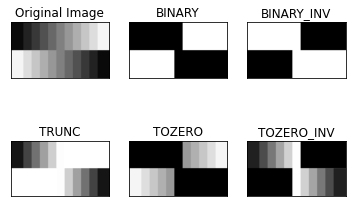

In [6]:
img = cv2.imread('gray.png',0)

ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

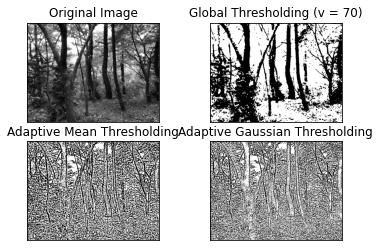

In [12]:
img = cv2.imread('forest.jpg',0)
img = cv2.medianBlur(img,5)

ret,th1 = cv2.threshold(img,70,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
cv2.THRESH_BINARY,11,2)

th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
cv2.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 70)',
'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()


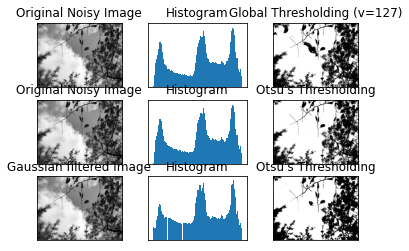

In [15]:
img = cv2.imread('sky.jpg',0)
cv2.imwrite('')

ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

images = [img, 0, th1,
img, 0, th2,
blur, 0, th3]

titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
'Original Noisy Image','Histogram',"Otsu's Thresholding",
'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])

plt.show()


In [17]:
img = cv2.imread('forest.jpg',0)
blur = cv2.GaussianBlur(img,(5,5),0)
cv2.imwrite('forest_br.jpg', blur)

hist = cv2.calcHist([blur],[0],None,[256],[0,256])
hist_norm = hist.ravel()/hist.max()
Q = hist_norm.cumsum()
bins = np.arange(256)
fn_min = np.inf
thresh = -1
for i in range(1,256):
    p1,p2 = np.hsplit(hist_norm,[i])
    q1,q2 = Q[i],Q[255]-Q[i]
    b1,b2 = np.hsplit(bins,[i])

    m1,m2 = np.sum(p1*b1)/q1, np.sum(p2*b2)/q2
    v1,v2 = np.sum(((b1-m1)**2)*p1)/q1,np.sum(((b2-m2)**2)*p2)/q2

    fn = v1*q1 + v2*q2
    if fn < fn_min:
        fn_min = fn
        thresh = i
    print(thresh, fn_min)



-1 inf
-1 inf
-1 inf
-1 inf
-1 inf
-1 inf
-1 inf
-1 inf
9 312032.7678732774
10 312029.0507704923
11 312021.7939440782
12 312002.3941099356
13 311923.6931886937
14 311779.62684825493
15 311473.61552028364
16 310909.1559868311
17 309939.18090069096
18 308601.7633577492
19 306863.67003151274
20 304515.3446551122
21 301588.41124454094
22 298430.9966924795
23 295090.9939709137
24 291586.0407222787
25 287845.2473105258
26 283981.6084200338
27 279976.99713937053
28 275776.980137541
29 271540.4721788792
30 267349.8155696109
31 263119.1704212924
32 258981.49847707263
33 254954.64116016336
34 251023.42424256838
35 247261.67548500802
36 243556.43398025422
37 239944.11942169693
38 236415.215839793
39 232915.48742479912
40 229474.97317860794
41 226208.03088157246
42 222888.55286139413
43 219660.26170244446
44 216491.15210143107
45 213305.01214563142
46 210280.28359152703
47 207301.23137339126
48 204367.47037212725
49 201442.66162271964
50 198444.94150045898
51 195546.51161747533
52 192646.634477548

C:\Users\U\AppData\Local\Temp\ipykernel_11604\979106560.py:16: RuntimeWarning: invalid value encountered in double_scalars
  m1,m2 = np.sum(p1*b1)/q1, np.sum(p2*b2)/q2
C:\Users\U\AppData\Local\Temp\ipykernel_11604\979106560.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  m1,m2 = np.sum(p1*b1)/q1, np.sum(p2*b2)/q2
C:\Users\U\AppData\Local\Temp\ipykernel_11604\979106560.py:19: RuntimeWarning: invalid value encountered in double_scalars
  fn = v1*q1 + v2*q2
